# Introduction to scientific computing with Python
*Maxime Sangnier*

September, 2023

## Part 4: Statistics

# Table of contents
1. [Sampling and testing](#part1)
    - [Random sampling](#part1sec1)
    - [Advanced distributions](#part1sec2)
    - [Descriptive statistics](#part1sec3)
    - [Hypothesis testing](#part1sec4)
1. [Data representation and manipulation](#part2)
    - [Reading and creating a dataframe](#part2sec1)
    - [Viewing data](#part2sec2)
    - [Indexing a table](#part2sec3)
    - [Adding and deleting items](#part2sec4)
    - [Managing missing data](#part2sec5)
    - [Descriptive statistics](#part2sec6)
    - [Pivot table](#part2sec7)
    - [Plotting](#part2sec8)
1. [Linear models](#part3)
    - [Linear regression](#part3sec1)
    - [ANOVA](#part3sec2)
1. [Exercises](#part4)
    - [Exercise 1](#part4sec1)
    - [Exercise 2](#part4sec2)
    - [Exercise 3](#part4sec3)
    - [Exercise 4](#part4sec4)
    - [Exercise 5](#part4sec5)
1. [References](#part5)


# Sampling and testing <a id="part1"></a>
## Random sampling <a id="part1sec1"></a>
### Simple random data
[Numpy](http://docs.scipy.org/doc/numpy/reference/routines.random.html#random-generator) offers several routines to generate easily uniform and normal random samples:

In [1]:
import numpy as np
import numpy.random as rdm
np.set_printoptions(precision=2)

rdm.rand(4, 4)  # Uniform sampling

array([[0.48, 0.64, 0.57, 0.2 ],
       [0.6 , 0.29, 0.73, 0.91],
       [0.31, 0.95, 0.14, 0.35],
       [0.59, 0.22, 0.62, 0.11]])

In [2]:
rdm.randn(4, 4)  # Standard normal sampling

array([[-0.51,  1.05, -0.2 ,  1.68],
       [-0.38,  1.82, -0.45, -0.24],
       [-2.06,  1.26,  0.15, -0.43],
       [-1.69,  1.35,  0.27, -1.27]])

In [3]:
rdm.randint(0, 10, size=(2, 3))  # Discrete uniform sampling (10 exclusive)

array([[7, 6, 7],
       [1, 5, 4]])

In the case where the sampled integers are supposed to index an array, one can replace:

In [4]:
a = np.arange(10)*10

ind = rdm.randint(0, 5, size=7)
a[ind]

array([10, 30, 40, 10, 20, 30, 30])

by:

In [5]:
rdm.choice(a, size=7)

array([20, 70, 30, 80, 10, 90, 10])

The previous routines sample integers with replacement.
To sample without replacement, one can use:

In [6]:
rdm.permutation(10)[:7]  # 7 first items of a random permutation of [0, …, 9]

array([2, 8, 4, 5, 1, 6, 7])

Note that one can also directly permute an array with a copy (`permutation`) or in-place (`shuffle`), instead of generating random indexes.

In [7]:
rdm.permutation(a)

array([30, 40, 60, 80, 20, 70, 10, 50, 90,  0])

In [8]:
rdm.shuffle(a)
a

array([60, 10, 30, 50, 80,  0, 70, 40, 20, 90])

**Question**

Draw a sample of size $100$ from a normal distribution with mean $10$ and standard deviation $2$.
Print the usual estimators of these two parameters to validate your operation.

In [ ]:
# Answer

### Random generator
It is obvious that random generators used in scientific computing are in fact pseudo-random generators.
As a consequence, the practitioner is able to control them to a certain extent.
In a way, this is good news for reproducible science!

Both examples below illustrate how to replay a random sampling.

In [10]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))

[44 47 64]
[37 12 72]
[40 15 72]


In [11]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))  # Same as before!

[44 47 64]
[37 12 72]
[40 15 72]


In [12]:
s = rdm.get_state()  # Get the internal state of the generator
print(np.array([rdm.randn() for it in range(3)]))
print(rdm.rand(3, 3))

[-2.14  1.64 -1.79]
[[0.2  0.62 0.3 ]
 [0.27 0.62 0.53]
 [0.13 0.51 0.18]]


In [13]:
rdm.set_state(s)  # Set the internal state of the generator to its previous value
for it in range(3):
    print(rdm.randn(1))  # Same as before!

[-2.14]
[1.64]
[-1.79]


### Distributions
Besides the previous routines, Numpy offers the possibility to draw samples from numerous [distributions](http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions).

In [14]:
x = rdm.poisson(lam=4, size=500)
print(x[:30])

[3 4 5 2 2 2 4 6 6 3 2 1 6 2 5 3 3 5 3 6 7 6 5 3 2 3 2 4 4 3]


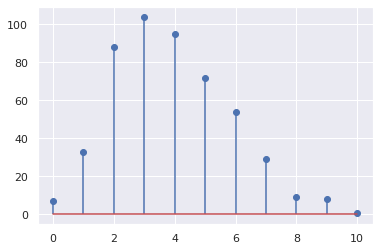

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots()
ax.stem(np.bincount(x));

**Question**

Draw a sample of size $1000$ from an exponential distribution with scale $2$ and plot a density histogram of this sample.

In [ ]:
# Answer

## Advanced distributions <a id="part1sec2"></a>
### Special functions
Many raw statistical routines (cumulative, survival and inverse functions) are available in the [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#raw-statistical-functions) module.

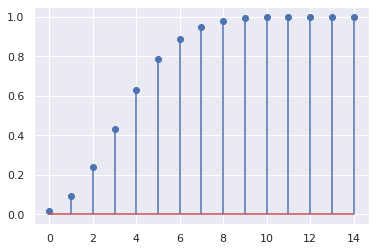

In [17]:
from scipy import special

plt.stem(special.pdtr(range(15), 4));  # Poisson cumulative distribution function

### Probability distributions
[Scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) implements probability distributions with two different classes: [*continuous random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-random-variables) and [*discrete random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-random-variables).
As an example, we focus here on the gamma distribution and illustrate the main methods available.

In [152]:
from scipy.stats import gamma

# gamma is an object corresponding to the standard gamma distribution
print("Distribution support: [{}, {}]".format(gamma.a, gamma.b))
print("Number of shape parameters: {} (name: {})".format(gamma.numargs, gamma.shapes))

Distribution support: [0.0, inf]
Number of shape parameters: 1 (name: a)


The shape parameter `a` appears in the probability density function:
<!-- $$f(x; a, \lambda) = x^{a-1}\exp(-\lambda x) \frac{\lambda^a}{\Gamma(a)}.$$ -->
$$f(x; a) = \frac{x^{a-1}\exp(-x)}{\Gamma(a)}.$$

Since the shape parameter `a` is required, one has to specify it for each method.

In [19]:
print("Mean:", gamma.mean(a=4))
print("Median:", gamma.median(a=4))
print("Variance:", gamma.var(a=4))

Mean: 4.0
Median: 3.672060748850897
Variance: 4.0


Two other parameters can be passed to the methods: `loc` and `scale`.
They correspond to shifting and rescaling the standard random variable with 
$x \mapsto scale \cdot x + loc.$

In [20]:
print("Mean:", gamma.mean(a=4, loc=2, scale=0.1))

Mean: 2.4


Since passing those parameters time and again can become quite bothersome, one can freeze the parameters:

In [21]:
dist = gamma(a=4, loc=2, scale=2)
print("Mean:", dist.mean())

Mean: 10.0


Now, let us have a look at the available methods.

In [22]:
print(dist.rvs(size=10))  # Draw a random sample

[ 6.56 17.46 24.21  7.11  9.63  5.71  8.27  7.46  9.37 14.17]


In [23]:
for n in range(4):
    print(f"Moment {n}:{dist.moment(n)}")

Moment 0:1.0
Moment 1:10.0
Moment 2:116.0
Moment 3:1544.0


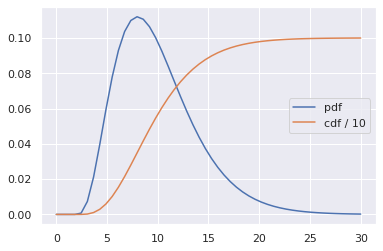

In [24]:
x = np.linspace(0, 30, num=50)

fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), label='pdf')  # Probability density function
ax.plot(x, dist.cdf(x)/10, label='cdf / 10')  # Cumulative density function
ax.legend(loc="best");

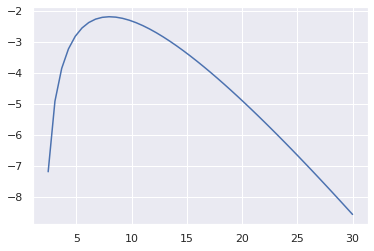

In [25]:
fig, ax = plt.subplots()
ax.plot(x, dist.logpdf(x), label='log pdf');  # Log of the pdf

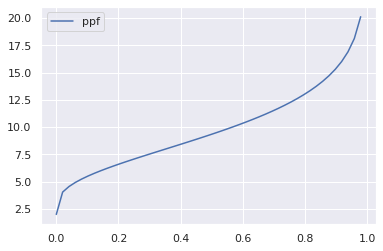

In [26]:
x = np.linspace(0, 1, num=50)

fig, ax = plt.subplots()
ax.plot(x, dist.ppf(x), label='ppf')  # Percent point function (inverse of cdf, also called quantile function) 
ax.legend(loc="upper left");

In [27]:
m = dist.expect(lambda x: np.exp(-x))  # Expectation of a function
print("First exponential moment: {0:0.2e}".format(m))

First exponential moment: 1.67e-03


Note that an unfrozen random variable (for instance `gamma`, not `rv`) benefits from two other methods: `fit` and `fit_loc_scale` for estimating parameters respectively by likelihood maximization and the moment method.

**Question**

Draw a sample of size $1000$ from a Laplace distribution (with location $1$ and scale $2$) and plot a density histogram of this sample.
Add the curve of the probability density function.

In [ ]:
# Answer

## Descriptive statistics <a id="part1sec3"></a>
### Order statistics, moments and correlation
Basic descriptive statistics such as min, max, mean, median, std, variance and percentiles can be computed with [array methods](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) or routines from [Numpy](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html).
Other empirical statistics such as mode and moments can be obtained with [Scipy statistical functions](http://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions).

### Histograms
A common task in statisics is to estimate the probability density function of a random variable, what is called density estimation.
In a first approach, this task can be achieved by computing a histogram.

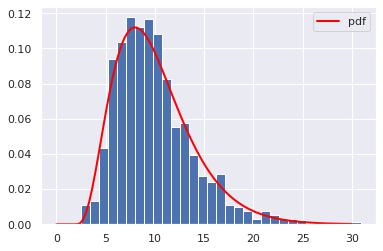

In [30]:
x = dist.rvs(size=1000)  # Draw a random sample

# Plot the histogram
fig, ax = plt.subplots()
ax.hist(x, bins='auto', density=True)

# Plot the pdf
x_pdf = np.linspace(0, 30, num=100)
ax.plot(x_pdf, dist.pdf(x_pdf), color="red", linewidth=2, label="pdf")
ax.legend();

### Kernel density estimation
Kernel desity estimation is a tool more efficient than a histogram for density estimation.
In Python, kernel density estimation can be performed with the `gaussian_kde` function.

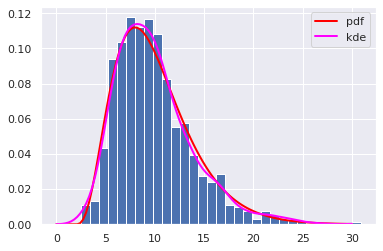

In [31]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)

fig, ax = plt.subplots()
ax.hist(x, bins='auto', density=True)
ax.plot(x_pdf, dist.pdf(x_pdf), color="red", linewidth=2, label="pdf")
ax.plot(x_pdf, kde(x_pdf), color="magenta", linewidth=2, label="kde")
ax.legend();

**Question**

Add on the previous figure the curves of a kernel density estimation with parameter `bw_method` (of `gaussian_kde`) varying according to `bw_values`.

In [32]:
bw_values = [0.1, 0.5, 1]

In [ ]:
# Answer

## Hypothesis testing <a id="part1sec4"></a>
### Analyzing one sample
As for R, many tests can be performed in Python.
For instance, a single sample may be analyzed with:
- `ttest_1samp`: T-test for the mean of one group of scores;
- `kstest`: Kolmogorov-Smirnov test for goodness of fit;
- `ksone`: general Kolmogorov-Smirnov one-sided test;
- `chisquare`: one-way chi square test;
- `anderson`: Anderson-Darling test for data coming from a particular distribution.

In [34]:
from scipy import stats

for dist in [stats.expon, stats.norm]:
    tt, pval = stats.ttest_1samp(dist.rvs(size=100), 0)
    print("{} sample: ".format(dist.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 10.13)
norm sample: p-value = 0.78 (statistics = 0.28)


On the one hand, the p-value for the exponential sample is small enough that we can reject the null hypothesis that the mean is $0$.
On the other hand, with high significance levels, we cannot reject the null hypothesis for the normal sample (this is comforting!).

Let us now test for a given distribution:

In [35]:
for dist in [stats.expon, stats.norm]:
    tt, pval = stats.kstest(dist.rvs(size=100), 'expon')
    print("{} sample: ".format(dist.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.83 (statistics = 0.06)
norm sample: p-value = 0.00 (statistics = 0.65)


Again, the result is as expected.

### Testing normality
As a special case, several tests exist for assessing the normality of a sample:
- `kurtosistest`: tests whether a dataset has normal kurtosis;
- `skewtest`: tests whether the skew is different from the normal distribution;
- `normaltest`: tests whether a sample differs from a normal distribution (D'Agostino and Pearson's test);
- `jarque_bera`: Jarque-Bera goodness of fit test on sample data;
- `shapiro`: Shapiro-Wilk test for normality.

In [36]:
for dist in [stats.expon, stats.norm]:
    print("{} sample:".format(dist.name))
    for name, test in [('skew', stats.skewtest), ('kurtosis', stats.kurtosistest)]:
        tt, pval = test(dist.rvs(size=100))
        print("   {} test: ".format(name), end="")
        print("   p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample:
   skew test:    p-value = 0.00 (statistics = 5.26)
   kurtosis test:    p-value = 0.20 (statistics = 1.27)
norm sample:
   skew test:    p-value = 0.79 (statistics = 0.27)
   kurtosis test:    p-value = 0.02 (statistics = 2.43)


Note that these two tests are combined in the normality test:

In [37]:
for dist in [stats.expon, stats.norm]:
    tt, pval = stats.normaltest(dist.rvs(size=100))
    print("{} sample: ".format(dist.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 58.62)
norm sample: p-value = 0.61 (statistics = 0.98)


**Question**

Dowload [this data file](https://perso.lpsm.paris/~msangnier/files/pythonM2/Gaussian_sample.mat).
Load the random sample stored in the variable `x` and test its normality.

In [38]:
from scipy.io import loadmat

x = loadmat('data/Gaussian_sample.mat')['x'].ravel()

In [ ]:
# Answer

### Comparing two samples
Again, many tests for two samples are available in the `scipy.stats` module:
- `ks_2samp`: Kolmogorov-Smirnov test for 2 samples;
- `ttest_ind`: T-test for the means of two independent samples of scores;
- `kstwobign`: Kolmogorov-Smirnov two-sided test for large N;
- `ttest_ind_from_stats`: T-test for means of two independent samples from descriptive statistics;
- `ttest_re`l: T-test on TWO RELATED samples of scores, a and b;
- `mannwhitneyu`: Mann-Whitney rank test on samples x and y;
- `wilcoxon`: Wilcoxon signed-rank test;
- `kruskal`: Kruskal-Wallis H-test for independent samples;
- `ansari`: Ansari-Bradley test for equal scale parameters;
- `bartlett`: Bartlett's test for equal variances;
- `levene`: Levene test for equal variances;
- `anderson_ksamp`: Anderson-Darling test for k-samples;
- `fligner`: Fligner-Killeen test for equality of variances;
- `median_test`: Mood's median test;
- `mood`: Mood's test for equal scale parameters.

As an example, on can test that two independent samples have identical means or that two independent samples are drawn from the same continuous distribution:

In [40]:
rvs1 = stats.norm.rvs(size=100, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=200, loc=0.1, scale=2)

tt, pval = stats.ttest_ind(rvs1,rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.07 (statistics = -1.79)


Here, the p-value is high enough that we cannot reject the null hypothesis that the two samples have identical means.
On the other hand, the following statistical test makes it possible to state that the two samples are drawn from different distribution (we reject the null hypothesis that they come from the same distribution):

In [41]:
tt, pval = stats.ks_2samp(rvs1, rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.00 (statistics = 0.26)


**Question**

Apply both T-tests `ttest_ind` and `ttest_rel` on the samples `rvs1` and `rvs1_coupled`.
Can you explain the difference in the results?

In [42]:
rvs1_coupled = rvs1 + rdm.randn(rvs1.size) * 0.1 + 0.1
print(rvs1.mean(), rvs1_coupled.mean())

-0.00044786591386120175 0.10489997936706247


In [ ]:
# Answer

### Other tests
- `pearsonr`: Pearson correlation coefficient and the p-value for testing non-correlation;
- `spearmanr`: Spearman rank-order correlation coefficient and the p-value to test for non-correlation;
- `power_divergence`: Cressie-Read power divergence statistic and goodness of fit test;
- `friedmanchisquare`: Friedman test for repeated measurements;
- `chi2_contingency`: Chi-square test of independence of variables in a contingency table;
- `fisher_exact`: Fisher exact test on a 2x2 contingency table.

# Data representation and manipulation <a id="part2"></a>
Following the example of R, Python comes with a package for handling data as a table : the [Pandas](http://pandas.pydata.org/) package provides a container for tables, called **dataframe**.
A dataframe is a two-dimensional table, in which each column contains measurements on one variable, and each row contains one individual.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables;
- storing in a clever manner a large amound of data;
- providing methods for descriptive statistics.

## Reading and creating a dataframe <a id="part2sec1"></a>
A dataframe may be either read from a file or created from raw data (the file is available [here](https://perso.lpsm.paris/~msangnier/files/pythonM2/defra_consumption.csv)):

In [44]:
!cat data/defra_consumption.csv

;England;Wales;Scotland;N Ireland
Cheese;105;103;103;66
Carcass meat;245;227;242;267
Other meat;685;803;750;586
Fish;147;160;122;93
Fats and oils;193;235;184;209
Sugars;156;175;147;139
Fresh potatoes;720;874;566;1033
Fresh Veg;253;265;171;143
Other Veg;488;570;418;355
Processed potatoes;198;203;220;187
Processed Veg;360;365;337;334
Fresh fruit;1102;1137;957;674
Cereals;1472;1582;1462;1494
Beverages;57;73;53;47
Soft drinks;1374;1256;1572;1506
Alcoholic drinks;375;475;458;135
Confectionery;54;64;62;41


In [45]:
import numpy as np
import pandas as pd

consumption = pd.read_csv('data/defra_consumption.csv', sep=';', index_col=0)
consumption

England  Wales  Scotland  N Ireland
Cheese                  105    103       103         66
Carcass meat            245    227       242        267
Other meat              685    803       750        586
Fish                    147    160       122         93
Fats and oils           193    235       184        209
Sugars                  156    175       147        139
Fresh potatoes          720    874       566       1033
Fresh Veg               253    265       171        143
Other Veg               488    570       418        355
Processed potatoes      198    203       220        187
Processed Veg           360    365       337        334
Fresh fruit            1102   1137       957        674
Cereals                1472   1582      1462       1494
Beverages                57     73        53         47
Soft drinks            1374   1256      1572       1506
Alcoholic drinks        375    475       458        135
Confectionery            54     64        62         41

In [46]:
timeseries = pd.DataFrame(data=np.random.randn(6,4),
                          index=pd.date_range('20130101', periods=6),
                          columns=list('ABCD'))
timeseries

A         B         C         D
2013-01-01  1.356271  2.246661 -1.824753  0.043105
2013-01-02  0.434127 -1.535574 -1.039692  0.915075
2013-01-03 -1.530174 -0.899955  2.107271  0.009253
2013-01-04  0.492976 -2.161993  0.217728 -0.480496
2013-01-05 -0.613730  0.273041  1.046299  0.316905
2013-01-06 -1.768534 -0.161372  0.204872  0.646503

In [47]:
df = pd.DataFrame({'A' : 1.,  # Single item
                    'B' : pd.Timestamp('20130102'),  # Single item
                    'C' : np.random.randn(4),  # Multiple item
                    'D' : pd.Categorical(["test", "train", "test", "train"])})
df

A          B         C      D
0  1.0 2013-01-02  1.357774   test
1  1.0 2013-01-02 -0.016339  train
2  1.0 2013-01-02 -0.111810   test
3  1.0 2013-01-02  0.678296  train

**Question**

Create a dataframe, the columns of which are entitled `normal`, `exponential` and `laplace`, and contain random samples of size $10$ of each distribution.

In [ ]:
# Answer

## Viewing data <a id="part2sec2"></a>
Since it is unrealistic to view a table in whole, Pandas provides different methods to give a sneak look at the aforesaid table.

In [49]:
timeseries.index  # Index of the table

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [50]:
consumption.index  # Index of the table

Index(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype='object')

In [51]:
consumption.columns  # Columns of the table

Index(['England', 'Wales', 'Scotland', 'N Ireland'], dtype='object')

In [52]:
consumption.head(n=3)

England  Wales  Scotland  N Ireland
Cheese            105    103       103         66
Carcass meat      245    227       242        267
Other meat        685    803       750        586

In [53]:
consumption.tail(n=3)

England  Wales  Scotland  N Ireland
Soft drinks          1374   1256      1572       1506
Alcoholic drinks      375    475       458        135
Confectionery          54     64        62         41

In [54]:
consumption.values  # Values are in a Numpy array

array([[ 105,  103,  103,   66],
       [ 245,  227,  242,  267],
       [ 685,  803,  750,  586],
       [ 147,  160,  122,   93],
       [ 193,  235,  184,  209],
       [ 156,  175,  147,  139],
       [ 720,  874,  566, 1033],
       [ 253,  265,  171,  143],
       [ 488,  570,  418,  355],
       [ 198,  203,  220,  187],
       [ 360,  365,  337,  334],
       [1102, 1137,  957,  674],
       [1472, 1582, 1462, 1494],
       [  57,   73,   53,   47],
       [1374, 1256, 1572, 1506],
       [ 375,  475,  458,  135],
       [  54,   64,   62,   41]])

The methods `info` and `describe` give respectively general and quantitative information concerning the dataframe.
In particular, `info` indicates the categorical variables (which are not treated by `describe`).

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       4 non-null      float64      
 1   B       4 non-null      datetime64[s]
 2   C       4 non-null      float64      
 3   D       4 non-null      category     
dtypes: category(1), datetime64[s](1), float64(2)
memory usage: 352.0 bytes


In [56]:
df.describe()

A                    B         C
count  4.0                    4  4.000000
mean   1.0  2013-01-02 00:00:00  0.476980
min    1.0  2013-01-02 00:00:00 -0.111810
25%    1.0  2013-01-02 00:00:00 -0.040206
50%    1.0  2013-01-02 00:00:00  0.330979
75%    1.0  2013-01-02 00:00:00  0.848166
max    1.0  2013-01-02 00:00:00  1.357774
std    0.0                  NaN  0.684681

If you suspect a variable to be categorical, you can state it.

In [57]:
df['E'] = np.random.randint(0, high=2, size=df.shape[0])
df['E'] = df['E'].astype('category')
df

A          B         C      D  E
0  1.0 2013-01-02  1.357774   test  1
1  1.0 2013-01-02 -0.016339  train  1
2  1.0 2013-01-02 -0.111810   test  1
3  1.0 2013-01-02  0.678296  train  0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       4 non-null      float64      
 1   B       4 non-null      datetime64[s]
 2   C       4 non-null      float64      
 3   D       4 non-null      category     
 4   E       4 non-null      category     
dtypes: category(2), datetime64[s](1), float64(2)
memory usage: 480.0 bytes


In [59]:
timeseries.sort_index(ascending=False)

A         B         C         D
2013-01-06 -1.768534 -0.161372  0.204872  0.646503
2013-01-05 -0.613730  0.273041  1.046299  0.316905
2013-01-04  0.492976 -2.161993  0.217728 -0.480496
2013-01-03 -1.530174 -0.899955  2.107271  0.009253
2013-01-02  0.434127 -1.535574 -1.039692  0.915075
2013-01-01  1.356271  2.246661 -1.824753  0.043105

In [60]:
timeseries.sort_values(by='A')

A         B         C         D
2013-01-06 -1.768534 -0.161372  0.204872  0.646503
2013-01-03 -1.530174 -0.899955  2.107271  0.009253
2013-01-05 -0.613730  0.273041  1.046299  0.316905
2013-01-02  0.434127 -1.535574 -1.039692  0.915075
2013-01-04  0.492976 -2.161993  0.217728 -0.480496
2013-01-01  1.356271  2.246661 -1.824753  0.043105

**Question**

Print the first 10 lines of the dataframe `consumption`.

In [ ]:
# Answer

## Indexing a table <a id="part2sec3"></a>
### Natural indexing

Explanations are provided with the `consumption` dataframe.

In [62]:
consumption.head()

England  Wales  Scotland  N Ireland
Cheese             105    103       103         66
Carcass meat       245    227       242        267
Other meat         685    803       750        586
Fish               147    160       122         93
Fats and oils      193    235       184        209

Natural indexing is performed with `[]`.
This indexes the **columns** of dataframes and the **rows** of series.

In [63]:
consumption['England']

Cheese                 105
Carcass meat           245
Other meat             685
Fish                   147
Fats and oils          193
Sugars                 156
Fresh potatoes         720
Fresh Veg              253
Other Veg              488
Processed potatoes     198
Processed Veg          360
Fresh fruit           1102
Cereals               1472
Beverages               57
Soft drinks           1374
Alcoholic drinks       375
Confectionery           54
Name: England, dtype: int64

In [64]:
s = consumption['England']  # A series
s['Cheese']

105

You may want to extract several columns or several rows.

In [65]:
consumption[['England', 'Scotland']].head()

England  Scotland
Cheese             105       103
Carcass meat       245       242
Other meat         685       750
Fish               147       122
Fats and oils      193       184

In [66]:
s[['Cheese', 'Other meat']]

Cheese        105
Other meat    685
Name: England, dtype: int64

**Remark:** selecting with `[[]]` always return a dataframe.

In [67]:
consumption[['England']].head()

England
Cheese             105
Carcass meat       245
Other meat         685
Fish               147
Fats and oils      193

**Question**

Print together columns `B` and `D` of the dataframe `df`.

In [ ]:
# Answer

### Label based indexing

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`.
Indexing has to be thought *as a matrix but with labels instead of positions*.
Hence, the **rows** are indexed first (instead of the columns with `[]`).

In [69]:
consumption.loc['Cheese']  # Single row

England      105
Wales        103
Scotland     103
N Ireland     66
Name: Cheese, dtype: int64

In [70]:
consumption.loc[:, 'England'].head()  # Single column

Cheese           105
Carcass meat     245
Other meat       685
Fish             147
Fats and oils    193
Name: England, dtype: int64

In [71]:
consumption.loc[['Cheese', 'Fresh potatoes']]  # Multiple rows

England  Wales  Scotland  N Ireland
Cheese              105    103       103         66
Fresh potatoes      720    874       566       1033

Slicing on rows and columns is possible but **endpoints are included**.

In [72]:
consumption.loc['Cheese':'Fish']  # Row slicing

England  Wales  Scotland  N Ireland
Cheese            105    103       103         66
Carcass meat      245    227       242        267
Other meat        685    803       750        586
Fish              147    160       122         93

In [73]:
consumption.loc['Cheese':'Cereals':4]  # Row slicing (from Cheese to Cereals with step 2)

England  Wales  Scotland  N Ireland
Cheese             105    103       103         66
Fats and oils      193    235       184        209
Other Veg          488    570       418        355
Cereals           1472   1582      1462       1494

In [74]:
consumption.loc['Cheese':'Cereals':4, :'Wales']  # Row and column slicing

England  Wales
Cheese             105    103
Fats and oils      193    235
Other Veg          488    570
Cereals           1472   1582

**Question**

What is the value in the dataframe `timeseries` at row `2013-01-04` and column `B`?

In [ ]:
# Answer

### Integer position based indexing

Interger location (or position) based indexing is done with `.iloc[]`.
It is similar to `.loc[]` but consideres only integer positions instead of labels.

**Remark:** endpoints are not included (similarly to Numpy).

In [76]:
consumption.iloc[:2]

England  Wales  Scotland  N Ireland
Cheese            105    103       103         66
Carcass meat      245    227       242        267

In [77]:
consumption.iloc[10::4, ::2]

England  Scotland
Processed Veg      360       337
Soft drinks       1374      1572

### Boolean indexing
Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [78]:
consumption.loc[consumption['England'] > 500]  # Row selection

England  Wales  Scotland  N Ireland
Other meat          685    803       750        586
Fresh potatoes      720    874       566       1033
Fresh fruit        1102   1137       957        674
Cereals            1472   1582      1462       1494
Soft drinks        1374   1256      1572       1506

In [79]:
consumption.loc[consumption['England'] > 500, consumption.loc['Other meat'] < 800]  # Row and column selection

England  Scotland  N Ireland
Other meat          685       750        586
Fresh potatoes      720       566       1033
Fresh fruit        1102       957        674
Cereals            1472      1462       1494
Soft drinks        1374      1572       1506

Operating on the whole dataframe puts `NaN` where the condition is not satisfied.
Beyond that, it is useful for assignments.

In [80]:
timeseries[timeseries > 0]  # Set NaN where condition is not satisfied

A         B         C         D
2013-01-01  1.356271  2.246661       NaN  0.043105
2013-01-02  0.434127       NaN       NaN  0.915075
2013-01-03       NaN       NaN  2.107271  0.009253
2013-01-04  0.492976       NaN  0.217728       NaN
2013-01-05       NaN  0.273041  1.046299  0.316905
2013-01-06       NaN       NaN  0.204872  0.646503

In [81]:
tt = timeseries.copy()
tt[tt < 0] = 0
tt

A         B         C         D
2013-01-01  1.356271  2.246661  0.000000  0.043105
2013-01-02  0.434127  0.000000  0.000000  0.915075
2013-01-03  0.000000  0.000000  2.107271  0.009253
2013-01-04  0.492976  0.000000  0.217728  0.000000
2013-01-05  0.000000  0.273041  1.046299  0.316905
2013-01-06  0.000000  0.000000  0.204872  0.646503

The `isin` method enables selecting with an OR condition.

In [82]:
df.loc[df['D'].isin(['test', 'train'])]

A          B         C      D  E
0  1.0 2013-01-02  1.357774   test  1
1  1.0 2013-01-02 -0.016339  train  1
2  1.0 2013-01-02 -0.111810   test  1
3  1.0 2013-01-02  0.678296  train  0

**Question**

Select rows of `df` with $1$ in column `E`.

In [ ]:
# Answer

### Strange behaviors of natural indexing I do not recommend
Here are some strange and confusing behaviors of Pandas objects.

I advise you **not to use** those features, but to adopt `.loc[]` and `.iloc[]` instead.

Series (**not dataframes**) can be indexed with integer numbers.

In [84]:
s[0]

/tmp/ipykernel_16349/243613605.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


105

And sliced… with endpoints **excluded**.

In [85]:
s[0:2]  # 0: Cheese, 1: Carcass meat, 2: Other meat

Cheese          105
Carcass meat    245
Name: England, dtype: int64

Slicing is also possible with labels… with endpoints **included**.

In [86]:
s['Cheese':'Other meat']

Cheese          105
Carcass meat    245
Other meat      685
Name: England, dtype: int64

You can also slice **rows** of a dataframe using the same notation (while one would expect to slice columns).
Even stranger, slicing works with integer positions (for example `consumption[2:5]`), still with endpoints included with labels and excluded with integer positions, but not single indexing (`consumption[2]` raises an error).

In [87]:
consumption['Cheese':'Cereals':2]

England  Wales  Scotland  N Ireland
Cheese              105    103       103         66
Other meat          685    803       750        586
Fats and oils       193    235       184        209
Fresh potatoes      720    874       566       1033
Other Veg           488    570       418        355
Processed Veg       360    365       337        334
Cereals            1472   1582      1462       1494

Similarly to slicing, Boolean indexing operates on dataframe rows.

In [88]:
consumption[consumption['England'] > 500]  # Similar to consumption.loc[consumption['England'] > 500]

England  Wales  Scotland  N Ireland
Other meat          685    803       750        586
Fresh potatoes      720    874       566       1033
Fresh fruit        1102   1137       957        674
Cereals            1472   1582      1462       1494
Soft drinks        1374   1256      1572       1506

### Selection random samples

The `sample` method makes it possible to randomly select rows (individuals) from a dataframe (without replacement).

In [89]:
consumption.sample(n=3)

England  Wales  Scotland  N Ireland
Processed Veg      360    365       337        334
Fish               147    160       122         93
Fresh fruit       1102   1137       957        674

## Adding and deleting items <a id="part2sec4"></a>
Let us consider a copy of the first 5 rows of `consumption`.

In [90]:
cons = consumption.iloc[:5].copy()
cons

England  Wales  Scotland  N Ireland
Cheese             105    103       103         66
Carcass meat       245    227       242        267
Other meat         685    803       750        586
Fish               147    160       122         93
Fats and oils      193    235       184        209

We successively add a column and a row to `cons`.

In [91]:
cons['all'] = cons.sum(axis=1)
cons.loc['Chocolate'] = [70, 60, 60, 150, 340]
cons

England  Wales  Scotland  N Ireland   all
Cheese             105    103       103         66   377
Carcass meat       245    227       242        267   981
Other meat         685    803       750        586  2824
Fish               147    160       122         93   522
Fats and oils      193    235       184        209   821
Chocolate           70     60        60        150   340

That we can now drop.

In [92]:
cons = cons.drop('Chocolate')
cons = cons.drop('all', axis=1)
cons

England  Wales  Scotland  N Ireland
Cheese             105    103       103         66
Carcass meat       245    227       242        267
Other meat         685    803       750        586
Fish               147    160       122         93
Fats and oils      193    235       184        209

Dataframes can be concatenated along columns and rows.

In [93]:
pd.concat((cons[['England']], cons[['Scotland']]), axis=1)

England  Scotland
Cheese             105       103
Carcass meat       245       242
Other meat         685       750
Fish               147       122
Fats and oils      193       184

In [94]:
pd.concat((cons.iloc[:2], cons.iloc[-2:]))

England  Wales  Scotland  N Ireland
Cheese             105    103       103         66
Carcass meat       245    227       242        267
Fish               147    160       122         93
Fats and oils      193    235       184        209

## Managing missing data <a id="part2sec5"></a>
Missing data are generally replaced by a `NaN` in the table.
Pandas offers several possibilities to manage them.

In [95]:
cons_md = consumption[consumption>200]
cons_md.iloc[:, -1] = consumption.iloc[:, -1]
cons_md.head()  # A table with missing data

England  Wales  Scotland  N Ireland
Cheese             NaN    NaN       NaN       66.0
Carcass meat     245.0  227.0     242.0      267.0
Other meat       685.0  803.0     750.0      586.0
Fish               NaN    NaN       NaN       93.0
Fats and oils      NaN  235.0       NaN      209.0

In [96]:
cons_md.dropna()  # Drop any row with missing data

England   Wales  Scotland  N Ireland
Carcass meat        245.0   227.0     242.0      267.0
Other meat          685.0   803.0     750.0      586.0
Fresh potatoes      720.0   874.0     566.0     1033.0
Other Veg           488.0   570.0     418.0      355.0
Processed Veg       360.0   365.0     337.0      334.0
Fresh fruit        1102.0  1137.0     957.0      674.0
Cereals            1472.0  1582.0    1462.0     1494.0
Soft drinks        1374.0  1256.0    1572.0     1506.0
Alcoholic drinks    375.0   475.0     458.0      135.0

In [97]:
cons_md.ffill().head()  # Fill missing data with previous real values
# This does not work with the first line

England  Wales  Scotland  N Ireland
Cheese             NaN    NaN       NaN       66.0
Carcass meat     245.0  227.0     242.0      267.0
Other meat       685.0  803.0     750.0      586.0
Fish             685.0  803.0     750.0       93.0
Fats and oils    685.0  235.0     750.0      209.0

In [98]:
cons_md.ffill().bfill().head()

England  Wales  Scotland  N Ireland
Cheese           245.0  227.0     242.0       66.0
Carcass meat     245.0  227.0     242.0      267.0
Other meat       685.0  803.0     750.0      586.0
Fish             685.0  803.0     750.0       93.0
Fats and oils    685.0  235.0     750.0      209.0

In [99]:
cons_md.isnull().any()  # Test for missing data

England       True
Wales         True
Scotland      True
N Ireland    False
dtype: bool

**Question**

By changing the `axis` parameter of `dropna`, drop the columns with missing values of `cons_md`.

In [ ]:
# Answer

## Descriptive statistics <a id="part2sec6"></a>
A dataframe comes with many methods for descriptive statistics:
- `count`: 	Number of non-null observations;
- `sum`: 	Sum of values;
- `mean`: 	Mean of values;
- `mad`: 	Mean absolute deviation;
- `median`: 	Arithmetic median of values;
- `min`: 	Minimum;
- `max`: 	Maximum;
- `mode`: 	Mode;
- `abs`: 	Absolute Value;
- `prod`: 	Product of values;
- `std`: 	Bessel-corrected sample standard deviation;
- `var`: 	Unbiased variance;
- `sem`: 	Standard error of the mean;
- `skew`: 	Sample skewness (3rd moment);
- `kurt`: 	Sample kurtosis (4th moment);
- `quantile`: 	Sample quantile (value at %);
- `cumsum`: 	Cumulative sum;
- `cumprod`: 	Cumulative product;
- `cummax`: 	Cumulative maximum;
- `cummin`: 	Cumulative minimum.

In [101]:
df.median(numeric_only=True)  # Median of numeric columns

A    1.000000
C    0.330979
dtype: float64

In [102]:
df.median(axis=1, numeric_only=True)  # Median of rows (numeric objects only)

0    1.178887
1    0.491831
2    0.444095
3    0.839148
dtype: float64

In [103]:
df['D'].value_counts()  # Histrogramming

D
test     2
train    2
Name: count, dtype: int64

**Question**

Compute the cumulative sum of the consumption data.

In [ ]:
# Answer

## Pivot table <a id="part2sec7"></a>
A pivot table aggregates the values of a column according to the similar values of other columns (which will become the row indexes and columns labels of the aggregated table).

In [105]:
df['E'] = ['success', 'failure', 'failure', 'success']
df

A          B         C      D        E
0  1.0 2013-01-02  1.357774   test  success
1  1.0 2013-01-02 -0.016339  train  failure
2  1.0 2013-01-02 -0.111810   test  failure
3  1.0 2013-01-02  0.678296  train  success

In [106]:
# Pivot table:
# values: label of the column whose values will be reorganized and displayed in the table
# index: indexes of the final table
# columns: columns of the final table
pd.pivot_table(df, values='C', index='D', columns='E')

E       failure   success
D                        
test  -0.111810  1.357774
train -0.016339  0.678296

## Plotting <a id="part2sec8"></a>
### With pandas
Pandas provides a [rich collection](http://pandas.pydata.org/pandas-docs/stable/visualization.html) of techniques to vizualize dataframes.
Here, we illustrate just a few of them.

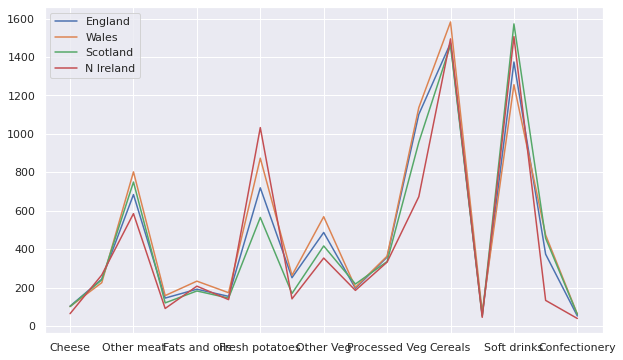

In [107]:
consumption.plot(figsize=(10, 6));  # Columns vs index

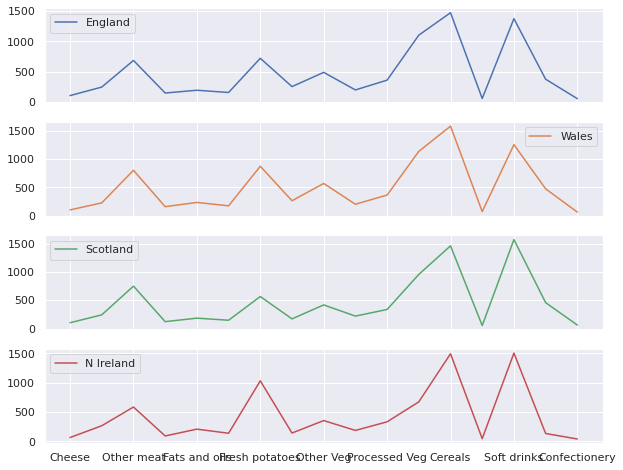

In [108]:
consumption.plot(subplots=True, figsize=(10, 8));  # Columns vs index

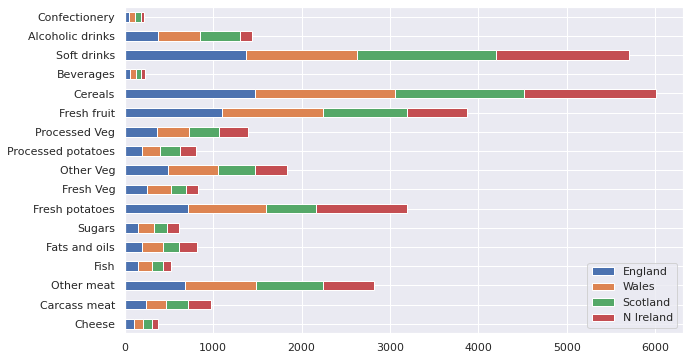

In [109]:
consumption.plot.barh(stacked=True, figsize=(10, 6));

**Question**

Plot a pie chart (parameter `kind='pie'` of `plot`) of the average consumption of foodstuff.

In [ ]:
# Answer

### With Seaborn
Besides its esthetics purpose, [Seaborn](https://seaborn.pydata.org/api.html) provides many routines for producing beautiful plots from dataframes, particularly for statistical data.

/home/maxime/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/maxime/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/maxime/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/maxime/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

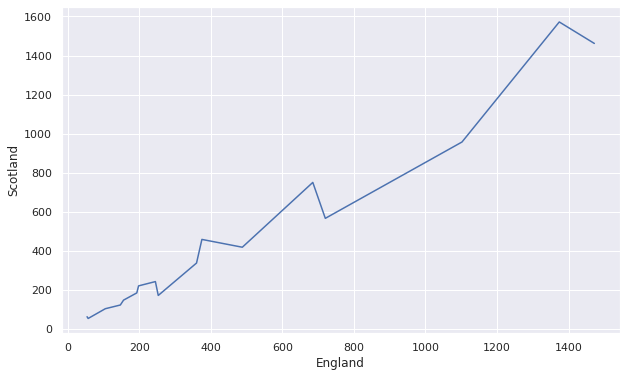

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='England', y='Scotland', data=consumption);

In [112]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

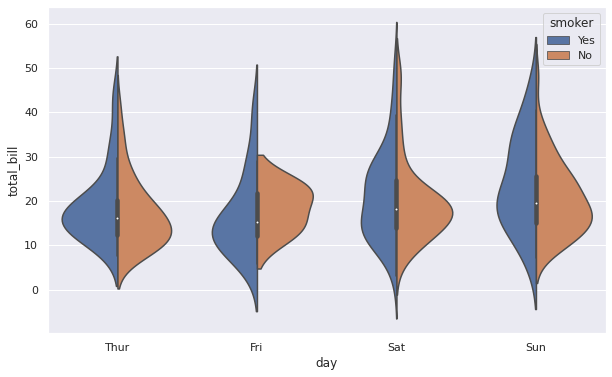

In [113]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', hue='smoker', split=True, data=tips);

<Axes: xlabel='day', ylabel='tip'>

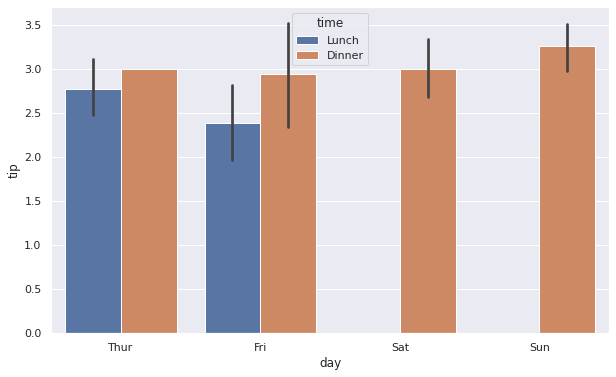

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='day', y='tip', hue='time', data=tips)

# Linear models <a id="part3"></a>

[StatsModels](http://statsmodels.sourceforge.net/stable/index.html) is a scientific module based on Pandas for performing statistical analyses in Python.
It provides tools for conducting data exploration, statistical tests and for the estimation of several statistical models.
As a statistical package, each estimator in StatsModels comes with an extensive list of resulting statistics.

## Linear regression <a id="part3sec1"></a>
We illustrate here a major feature of StatsModels, which is [linear regression](http://www.statsmodels.org/stable/regression.html#technical-documentation).
### Simple example

In [115]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Generate data
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

y[np.random.permutation(y.size)[:3]] += 4 * (-1)**np.random.randint(0, 2, size=3)  # 3 outliers

In [116]:
# Fit the model
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     58.66
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           9.34e-16
Time:                        11:40:24   Log-Likelihood:                -74.982
No. Observations:                  50   AIC:                             158.0
Df Residuals:                      46   BIC:                             165.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6495      0.059     10.932      0.000       0.530       0.769
x2             0.5285      0.234      2.263      0.028       0.058       0.999
x3            -0.0326      0.005     -6.241      0.000      -0.043      -0.022
const          4.3120      0.385     11.194      0.000       3.537       5.087
==============================================================================
Omnibus:                       24.756   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.018
Skew:                           0.877   Prob(JB):                     2.15e-29
Kurtosis:                      10.765   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Main attributes of the fitted model are:

In [117]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.fittedvalues)

Parameters:  [ 0.65  0.53 -0.03  4.31]
Standard errors:  [0.06 0.23 0.01 0.39]
Predicted values:  [ 3.5   4.1   4.66  5.14  5.53  5.82  6.03  6.17  6.27  6.37  6.51  6.7
  6.97  7.32  7.72  8.16  8.61  9.02  9.37  9.63  9.79  9.86  9.86  9.8
  9.73  9.69  9.69  9.76  9.91 10.13 10.39 10.67 10.93 11.14 11.27 11.31
 11.24 11.1  10.89 10.66 10.43 10.25 10.12 10.07 10.1  10.18 10.29 10.4
 10.46 10.46]


A method called `predict` is also available for prediction with the estimator:

In [118]:
res.predict(X)  # Same as res.fittedvalues

array([ 3.5 ,  4.1 ,  4.66,  5.14,  5.53,  5.82,  6.03,  6.17,  6.27,
        6.37,  6.51,  6.7 ,  6.97,  7.32,  7.72,  8.16,  8.61,  9.02,
        9.37,  9.63,  9.79,  9.86,  9.86,  9.8 ,  9.73,  9.69,  9.69,
        9.76,  9.91, 10.13, 10.39, 10.67, 10.93, 11.14, 11.27, 11.31,
       11.24, 11.1 , 10.89, 10.66, 10.43, 10.25, 10.12, 10.07, 10.1 ,
       10.18, 10.29, 10.4 , 10.46, 10.46])

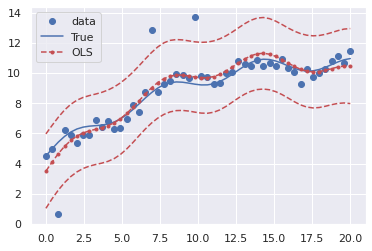

In [119]:
# Plot the regression
prstd, iv_l, iv_u = wls_prediction_std(res)  # Curves for standard deviation

fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [120]:
residuals = y - res.predict(X)  # Same as res.resid
print(residuals)

[ 9.97e-01  8.71e-01 -4.03e+00  1.07e+00  3.92e-01 -4.67e-01 -1.05e-01
 -2.65e-01  5.84e-01  7.11e-02  3.09e-01 -4.17e-01 -6.15e-01 -3.67e-01
  1.64e-01 -7.52e-01  1.61e-01  3.85e+00 -6.04e-01 -3.78e-01 -3.54e-01
  9.96e-02  3.32e-03 -1.55e-01  3.99e+00  1.42e-01  2.61e-02 -4.87e-01
 -5.91e-01 -1.53e-01 -3.11e-01  1.55e-01 -3.33e-01 -6.61e-01 -3.82e-01
 -8.30e-01 -5.94e-01 -6.36e-01  5.90e-02 -3.50e-01 -3.46e-01 -9.60e-01
  1.19e-01 -3.33e-01 -7.77e-02  5.75e-02  4.77e-01  7.42e-01  2.04e-01
  1.01e+00]


The sum of squared residuals (or residual sum of squares) is:

In [121]:
print(np.sum(res.resid**2), res.ssr)

58.75761566768156 58.75761566768157


while an unbiased estimate of the variance is:

In [122]:
print(res.ssr / res.df_resid, res.scale)

1.2773394710365558 1.2773394710365558


The hat (or projection matrix) is:

In [123]:
H = X.dot(np.linalg.solve(X.T.dot(X), X.T))

Then, the studentized residuals are:

In [124]:
t = res.resid / np.sqrt(res.scale*(1-np.diag(H)))  # Standardized residuals
ts = t * np.sqrt( (res.df_resid-1) / (res.df_resid-t**2))  # Studentized residuals
print(ts)

[ 9.70e-01  8.29e-01 -4.56e+00  1.01e+00  3.64e-01 -4.29e-01 -9.55e-02
 -2.39e-01  5.26e-01  6.42e-02  2.82e-01 -3.83e-01 -5.65e-01 -3.34e-01
  1.48e-01 -6.74e-01  1.44e-01  4.04e+00 -5.51e-01 -3.47e-01 -3.24e-01
  9.04e-02  2.99e-03 -1.39e-01  4.24e+00  1.28e-01  2.38e-02 -4.45e-01
 -5.39e-01 -1.38e-01 -2.79e-01  1.39e-01 -3.00e-01 -6.02e-01 -3.50e-01
 -7.65e-01 -5.42e-01 -5.74e-01  5.28e-02 -3.13e-01 -3.12e-01 -8.83e-01
  1.09e-01 -3.08e-01 -7.17e-02  5.29e-02  4.41e-01  6.97e-01  1.94e-01
  9.93e-01]


The studentized residuals can be directly obtained by:

In [125]:
print(res.outlier_test()[:, 0])

[ 9.70e-01  8.29e-01 -4.56e+00  1.01e+00  3.64e-01 -4.29e-01 -9.55e-02
 -2.39e-01  5.26e-01  6.42e-02  2.82e-01 -3.83e-01 -5.65e-01 -3.34e-01
  1.48e-01 -6.74e-01  1.44e-01  4.04e+00 -5.51e-01 -3.47e-01 -3.24e-01
  9.04e-02  2.99e-03 -1.39e-01  4.24e+00  1.28e-01  2.38e-02 -4.45e-01
 -5.39e-01 -1.38e-01 -2.79e-01  1.39e-01 -3.00e-01 -6.02e-01 -3.50e-01
 -7.65e-01 -5.42e-01 -5.74e-01  5.28e-02 -3.13e-01 -3.12e-01 -8.83e-01
  1.09e-01 -3.08e-01 -7.17e-02  5.29e-02  4.41e-01  6.97e-01  1.94e-01
  9.93e-01]


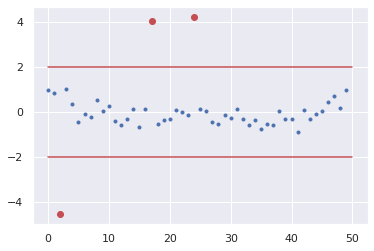

In [126]:
fig, ax = plt.subplots()
ax.plot(ts, '.')
ax.plot([0, X.shape[0]], [-2]*2, 'r')
ax.plot([0, X.shape[0]], [2]*2, 'r')

outliers = np.where(res.outlier_test()[:, -1]<0.1)
ax.plot(outliers, res.outlier_test()[outliers, 0], 'ro')

Note that studentized residuals are only asymptotically normal.

In [127]:
from scipy.stats import normaltest, probplot

print(normaltest(ts))

NormaltestResult(statistic=23.692408364899936, pvalue=7.165704456116297e-06)


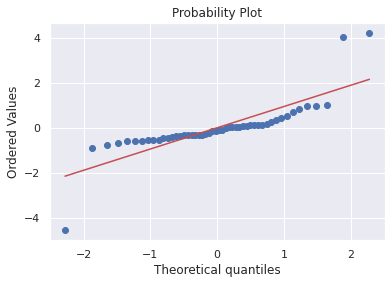

In [128]:
from scipy.stats import t as student_dist

probplot(ts, dist=student_dist(df=res.df_resid-1), plot=plt);

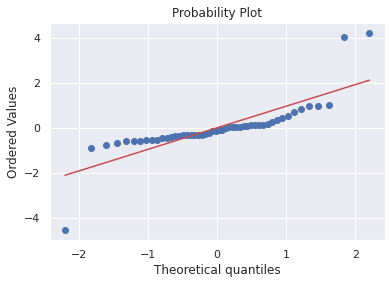

In [129]:
probplot(ts, dist='norm', plot=plt);

### Another example

In [130]:
df = sm.datasets.get_rdataset('iris').data
df.columns = [name.replace('.', '_').lower() for name in df.columns]  # Make name pythonic

df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [131]:
df.isnull().any()  # Check if there is any missing value

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [132]:
import statsmodels.formula.api as smf

model =  smf.ols('sepal_length ~ petal_length + petal_width', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.00e-47
Time:                        11:40:25   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1906      0.097     43.181      0.000       3.999       4.382
petal_length     0.5418      0.069      7.820      0.000       0.405       0.679
petal_width     -0.3196      0.160     -1.992      0.048      -0.637      -0.002
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.540
Skew:                           0.060   Prob(JB):                        0.763
Kurtosis:                       2.732   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

StatsModels accepts categorical variables:

In [133]:
model = smf.ols('sepal_length ~ petal_length + petal_width + C(species)', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.8
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.33e-56
Time:                        11:40:25   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             106.2
Df Residuals:                     145   BIC:                             121.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6830      0.107     34.291      0.000       3.471       3.895
C(species)[T.versicolor]    -1.5984      0.206     -7.770      0.000      -2.005      -1.192
C(species)[T.virginica]     -2.1126      0.304     -6.949      0.000      -2.714      -1.512
petal_length                 0.9059      0.074     12.191      0.000       0.759       1.053
petal_width                 -0.0060      0.156     -0.038      0.969      -0.315       0.303
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.679
Skew:                           0.142   Prob(JB):                        0.712
Kurtosis:                       2.832   Cond. No.                         61.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To regress a variable *y* on all others, there is no notation equivalent to *y ~ .* in R. Instead, you can use the following workaround.

In [134]:
def all_predictors(df, outcome):
    return outcome + " ~ " + " + ".join(df.columns.difference([outcome]))

print(all_predictors(df, "sepal_length"))

sepal_length ~ petal_length + petal_width + sepal_width + species


## ANOVA <a id="part3sec2"></a>
The last linear model can be formalized as:
$$Y = \mu \mathbb 1 + X\beta + A \alpha + \epsilon, \qquad s.t.~ \alpha_1 = 0,$$
where
- $Y \in \mathbb R^n$ is the vector of observations (`sepal_length`);
- $\mu \in \mathbb R$ is the intercept;
- $X \in \mathbb R^{n \times 2}$ is the design matrix;
- $\beta \in \mathbb R^2$ is the vector of coefficients (`petal_length` and `petal_width`);
- $A \in \mathbb R^{n \times 3}$ is the indicator matrix corresponding to the categorical variable (`species`);
- $\alpha \in \mathbb R^3$ is the vector of effects of the categorical values `setosa`, `versicolor` and `virginica`;
- $\epsilon \sim \mathcal N(0, \sigma^2 I_n)$ is a random noise.

An analysis of variance (in its generalized version) tests the significance of continuous and categorical variables (based on a Fisher test), that is the null hypotheses (see the ANOVA table below):
- $\alpha_1 = \alpha_2 = \alpha_3 = 0$ (significance of `species`);
- $\beta_1 = 0$ (significance of `petal_length`);
- $\beta_2 = 0$ (significance of `petal_width`).

In [135]:
sm.stats.anova_lm(res)  # ANOVA table

df     sum_sq    mean_sq           F        PR(>F)
C(species)      2.0  63.212133  31.606067  274.728446  4.785160e-50
petal_length    1.0  22.274541  22.274541  193.616313  1.718161e-28
petal_width     1.0   0.000169   0.000169    0.001472  9.694469e-01
Residual      145.0  16.681489   0.115045         NaN           NaN

We read the p-values in the last column.
For the species, we observe a p-value that is small enough to reject the null hypothesis that the species does not impact the model.
In the same manner, we can conclude that `petal_length` is an important factor (its coefficient is non-zero).
However, the p-value for `petal_width` is large enough to conclude that, given the covariates `species` and `petal_length`, the variable `petal_width` does not provide an additional information, that explains the outcome `sepal_length` (it has no effect on the response variable).

Assume now that you **know** $\beta$ and consider the model:
$$\tilde Y = Y - X\beta = \mu + A \alpha + \epsilon, \qquad s.t.~ \alpha_1 = 0.$$
The impact of the categorical variable `species` can be illustrated on the following graph, showing that the means are different according to the modalities of species (`setosa`, `versicolor`, `virginica`).

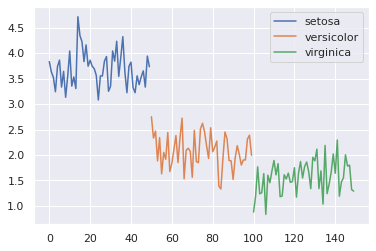

In [136]:
# Observations \tilde Y
sepal_beta = (0.9059, -0.006)
observations = df['sepal_length'] - sepal_beta[0]*df['petal_length'] - sepal_beta[1]*df['petal_width']

plt.plot(observations[df['species']=='setosa'], label="setosa")
plt.plot(observations[df['species']=='versicolor'], label="versicolor")
plt.plot(observations[df['species']=='virginica'], label="virginica")
plt.legend(loc='best');

Assume now that you would like to test the Gaussian assumption of the model, that is for each modality indexed by $j \in \{1, 2, 3\}$, observations are distributed according to $\mathcal N(\mu + \alpha_j, \sigma^2)$.
You should test if the groups:
1. are normally distributed;
1. with equal variance.

In [137]:
from scipy.stats import levene, bartlett, normaltest

for modality in ['setosa', 'versicolor', 'virginica']:
    print(normaltest(observations[df['species']==modality]))

NormaltestResult(statistic=4.053279083071296, pvalue=0.13177761110864925)
NormaltestResult(statistic=0.7548077096205367, pvalue=0.6856391193186202)
NormaltestResult(statistic=0.11510513766630709, pvalue=0.944072260304799)


Samples can be considered normaly distributed.
What about the variances?

In [138]:
print(levene(observations[df['species']=='setosa'], observations[df['species']=='versicolor'],
             observations[df['species']=='virginica']))
print(bartlett(observations[df['species']=='setosa'], observations[df['species']=='versicolor'],
               observations[df['species']=='virginica']))

LeveneResult(statistic=0.14161247465879312, pvalue=0.8680758119020389)
BartlettResult(statistic=0.22506978073272027, pvalue=0.8935661697135951)


Variances can be considered the same.

# Exercises <a id="part4"></a>
## Exercise 1 <a id="part4sec1"></a>
Draw a sample from a chi-squared distribution with 5 degrees of freedom.
Plot the histogram and the probability distribution function on the same figure.

In [ ]:
# Answer

## Exercise 2 <a id="part4sec2"></a>
Generate a sample from a standard normal distribution and another from a gamma distribution with shape $a=\frac 14$ and scale $\theta=2$.
Test for the null hypothesis that both samples have equal variances.


In [ ]:
# Answer

## Exercise 3 <a id="part4sec3"></a>
Plot the probability density function of the Beta distribution with parameters $\alpha=2$ and $\beta=5$.

Using Scheffé's lemma:
>Let $(X_n)_{n\ge 1}$ be a sequence of random variables with densities $(f_n)_{n\ge 1}$ with respect to a measure $\mu$
and $X$ be a random variable with density $f$ with respect to $\mu$.
If $(f_n)_{n\ge 1}$ converges pointwise $\mu$-almost everywhere to $f$, then
$$
X_n \underset{n \to \infty}{\overset{d}{\longrightarrow}} X,
$$
where $\overset{d}{\longrightarrow}$ means convergence in distribution.

Illustrate the Central Limit Theorem with a sample coming from the Beta distribution with parameters $\alpha=2$ and $\beta=5$.
Perform a test against a standard normal distribution to support the result.

In [ ]:
# Answer

## Exercise 4 <a id="part4sec4"></a>
This exercise proposes to analyse a dataset.
- Load the R dataset `airquality` with `StatsModels` utilities.
- Make columns names pythonic (remove "." from solar.m).
- Drop rows with missing data.
- Display a summary of the dataset.
- Perform a linear regression to explain the ozone variable with solar_r , wind, temp and month (categorical variable).
- Display a summary of the linear regression.
- Are the studentized residuals normaly distributed?
- Perform an ANOVA.
- Predict the air quality for [today](https://www.wolframalpha.com/input/?i=La+Guardia+Airport) (suppose that solar_r = 207.0, convert wind to miles per hour and temp to degrees Fahrenheit by hitting `Show nonmetric`).
Use `res.predict(dict(solar_r=207, …))`.


In [ ]:
# Answer

**Answer:**
…

## Exercise 5 <a id="part4sec5"></a>
Implement a [Metropolis Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).
Use it to sample a Beta distribution with parameters $\alpha=2$ and $\beta=5$.
Compare with what is obtained with Scipy routines.

In [ ]:
# Answer

# References <a id="part5"></a>
- [StatsModels documentation](http://statsmodels.sourceforge.net/stable/index.html).
- [Scipy lecture notes](http://www.scipy-lectures.org/index.html).
- To go further: [advanced visualization with Seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html).